# Flight Delay Analysis

Flight delays and cancellations are typical problems all of us face when traveling. The airports and airline industry try to minimize the impact on the customers and improve their experience. On the other the airline industry also optimizes the flights to fly through their network of cities. For example, a flight from Seattle flies to Chicago, and then further is scheduled to fly from Chicago to New York City. As a result of this efficient utilization of the flights, a popular belief among travelers is that flight delays or cancellations happen more often as the day progresses. Though it seems intuitive, we as data scientists will always look at data to check our intuition.

The U.S. Department of Transportation’s (DOT) Buereau of Transportation Statistics tracks the performance of domestic flights operated by large airline carriers. In this project we will work with dataset compiled by Kaggle providing summary information on the number of on-time, delayed, canceled, and diverted flights published by DOT’s montly Air Travel Consumer Report for the year 2015!

# Data Preparation:

The first thing I did was import the data.

In [1]:
# Python Libraries Used in Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
import plotly.io as pio
pio.renderers.default = "browser"

# Data 
airports = pd.read_csv("airports.csv")
airlines = pd.read_csv("airlines.csv")
flights  = pd.read_csv("https://www3.nd.edu/~jng2/flights_20_perc.csv")

### Inspecting Data:
#### Columns:
Next, I printed out the columns, so I could gain a general idea of the data tables.

In [2]:
print("Airports")
print(airports.columns)
print("Airlines")
print(airlines.columns)
print("Flights")
print(flights.columns)

Airports
Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')
Airlines
Index(['IATA_CODE', 'AIRLINE'], dtype='object')
Flights
Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


#### First Five Rows:
After printing out the columns, I printed out the heads of the data frames.

Airports:

In [3]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


Airlines:

In [4]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


Flights:

In [5]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,10,14,3,UA,356,N494UA,11618,13930,1945,...,2104.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,27,2,MQ,3458,N671MQ,ORD,MLI,820,...,1100.0,107.0,0,0,NaN,34.0,0.0,0.0,63.0,10.0
2,2015,7,6,1,B6,1202,N535JB,FLL,JFK,1507,...,1809.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,6,13,6,DL,2529,N301DQ,ATL,CLE,2204,...,2343.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,6,6,6,WN,2560,N7729A,CLT,BWI,1325,...,1459.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Prework:

First, I want to define the varaibles I use in this project.

Definitions:

 - Two types of delays:
        
  - Departure delays
        
  - Arrival delays
        
Columns Created Below:

 - DATE:
  - The actual date of the flight in the format of Year, Month, Day 
 - DEPARTURE_PERIOD:
  - Early: Contains any flight between 12 am and 8 am
  - Mid_Day: Conatins any flight between 8 am and 4 pm
  - Later: Contains any flight between 4 pm and 12 pm
 - ARRIVAL_PERIOD:
  - Early: Contains any flight between 12 am and 8 am
  - Mid_Day: Conatins any flight between 8 am and 4 pm 
  - Later: Contains any flight between 4 pm and 12 pm
 - DEPARTURE_DELAYED:
  - Binary variable that contains 1 if the flight was delayed at depature and 0 if the flight is not delayed at departure
 - ARRIVAL_DELAYED:
  - Binary variable that contains 1 if the flight was delayed at arrival and 0 if the flight is not delayed at arrival
 - DEPART_HOUR:
  - Contains the hour the flight was scheduled to depart from the column scheduled departure time
 - ARRIVAL_HOUR:
  - Contains the hour the flight was scheduled to arrive from the column scheduled arrival time
  
#### Copying the data:
I did this in case I made a mistake, so I did not have to reload the data.

In [6]:
flights_1 = flights.copy()

#### Combine year-month-day:

In [7]:
flights_1['Date'] = pd.to_datetime(flights_1[['YEAR', 'MONTH', 'DAY']], format='%Y%b%d')

#### Creating Early, Mid, and Late Column for Departures:

In [8]:
flights_1.loc[flights_1['SCHEDULED_DEPARTURE'] < 800, 'DEPARTURE_PERIOD'] = 'Early'
flights_1.loc[(flights_1['SCHEDULED_DEPARTURE'] >= 800) & (flights_1['SCHEDULED_DEPARTURE'] < 1600), 'DEPARTURE_PERIOD'] = 'Mid_Day'
flights_1.loc[flights_1['SCHEDULED_DEPARTURE'] >= 1600, 'DEPARTURE_PERIOD'] = 'Late'

#### Creating Early, Mid, Late Column for Arrivals

In [9]:
flights_1.loc[flights_1['SCHEDULED_ARRIVAL'] < 800, 'ARRIVAL_PERIOD'] = 'Early'
flights_1.loc[(flights_1['SCHEDULED_ARRIVAL'] >= 800) & (flights_1['SCHEDULED_ARRIVAL'] < 1600), 'ARRIVAL_PERIOD'] = 'Mid_Day'
flights_1.loc[flights_1['SCHEDULED_ARRIVAL'] >= 1600, 'ARRIVAL_PERIOD'] = 'Late'

#### Creating binary column DEPARTURE_DELAYED:

In [10]:
flights_1.loc[flights_1['DEPARTURE_DELAY'] > 0, 'DEPARTURE_DELAYED'] = 1
flights_1.loc[flights_1['DEPARTURE_DELAY'] <= 0, 'DEPARTURE_DELAYED'] = 0

#### Creating binary column ARRIVAL_DELAYED:

In [11]:
flights_1.loc[flights_1['ARRIVAL_DELAY'] > 0, 'ARRIVAL_DELAYED'] = 1
flights_1.loc[flights_1['ARRIVAL_DELAY'] <= 0, 'ARRIVAL_DELAYED'] = 0

#### Creating DEPART_HOUR and ARRIVAL_HOUR:

In [12]:
flights_1['DEPART_HOUR']=flights_1['SCHEDULED_DEPARTURE'].astype(str).str[-4:-2].replace('', '0').astype(int)
flights_1['ARRIVAL_HOUR']=flights_1['SCHEDULED_ARRIVAL'].astype(str).str[-4:-2].replace('', '0').astype(int)

# Claim 1: Do flight delays happen more often later in the day comapred to earlier in the day?

### Overall Flight Delays (Absolute & Relative):

In [13]:
flights_departure_delay = flights_1[flights_1.CANCELLED == 0].groupby('DEPARTURE_PERIOD').agg({
    'DEPARTURE_DELAYED': 'sum', 
    'FLIGHT_NUMBER': 'count'}).rename(columns= {
    'DEPARTURE_DELAYED':'Delayed',
    'FLIGHT_NUMBER':'Total'})

flights_arrival_delay = flights_1[flights_1.CANCELLED == 0].groupby('ARRIVAL_PERIOD').agg({
    'ARRIVAL_DELAYED': 'sum', 
    'FLIGHT_NUMBER': 'count'}).rename(columns= {
    'ARRIVAL_DELAYED':'Delayed',
    'FLIGHT_NUMBER':'Total'})

flights_departure_delay['Percentage'] = flights_departure_delay.Delayed / flights_departure_delay.Total
flights_arrival_delay['Percentage'] = flights_arrival_delay.Delayed / flights_arrival_delay.Total

In [14]:
q_1_depart=flights_departure_delay.reindex(['Early', 'Mid_Day', 'Late'])
q_1_arrival=flights_arrival_delay.reindex(['Early', 'Mid_Day', 'Late'])

#### Departures:

In [15]:
q_1_depart

,Delayed,Total,Percentage
DEPARTURE_PERIOD,,,
Early,36745.0,186061,0.197489
Mid_Day,205692.0,567169,0.362664
Late,181160.0,392442,0.461622


#### Arrivals:

In [16]:
q_1_arrival

,Delayed,Total,Percentage
ARRIVAL_PERIOD,,,
Early,24309.0,82295,0.295389
Mid_Day,169780.0,534924,0.317391
Late,223285.0,528453,0.422526


#### Visualizations:

In [17]:
fig_absolute = go.Figure(data=[
    go.Bar(name='Departures', 
           x=q_1_depart.index, 
           y=q_1_depart['Delayed']),
    go.Bar(name='Arrivals',
           x=q_1_arrival.index,
           y=q_1_arrival['Delayed'])])
fig_absolute.update_layout(barmode='group', title_text='Absolute Delays',
                           xaxis_title='Number of Delays', yaxis_title='Time of Day')
fig_absolute.show()

In [18]:
fig_relative = go.Figure(data=[
    go.Bar(name='Departures', 
           x=q_1_depart.index, 
           y=q_1_depart['Percentage']),
    go.Bar(name='Arrivals',
           x=q_1_arrival.index,
           y=q_1_arrival['Percentage'])])
fig_relative.update_layout(barmode='group', title_text='Relative Delays',
                           xaxis_title='Time of Day', yaxis_title='Percent')
fig_relative.show()

The time of day with the most absolute delays are arrivals later in the day. There are over 285 thousand flights that delayed arriving later in the day. However, when you review the relative delays based on the number of flights at those hours, it becomes clear that the absolute numbers do not match the relative numbers. In fact, late in the day, a relatively higher percentage of flights are delayed when departing.

# Claim 2: Does the response to Claim 1 depend on the month of the year?

### Absolute Departure Delay:

The tables below contain departues and are grouped by the columns "MONTH" and "DEPARTURE_PERIOD."

In [19]:
depart_delay_month = flights_1[flights_1.DEPARTURE_DELAY > 0].groupby(['MONTH', 'DEPARTURE_PERIOD'])['FLIGHT_NUMBER'].count().rename('Number_Delayed_Departures')
depart_delay_month = pd.DataFrame(depart_delay_month)
depart_delay_month.reset_index(inplace=True)
depart_delay_month.head()

,MONTH,DEPARTURE_PERIOD,Number_Delayed_Departures
0,1,Early,2823
1,1,Late,14358
2,1,Mid_Day,18229
3,2,Early,2875
4,2,Late,14065


In [20]:
depart_delay_month_early = depart_delay_month[depart_delay_month.DEPARTURE_PERIOD == 'Early']
depart_delay_month_mid_day = depart_delay_month[depart_delay_month.DEPARTURE_PERIOD == 'Mid_Day']
depart_delay_month_late = depart_delay_month[depart_delay_month.DEPARTURE_PERIOD == 'Late']
fig_delay_month_depart = go.Figure(data=[
    go.Bar(name='Early', 
           x=depart_delay_month_early.MONTH, 
           y=depart_delay_month_early.Number_Delayed_Departures),
    go.Bar(name='Mid Day',
           x=depart_delay_month_mid_day.MONTH,
           y=depart_delay_month_mid_day.Number_Delayed_Departures),
    go.Bar(name='Late',
          x = depart_delay_month_late.MONTH,
          y = depart_delay_month_late.Number_Delayed_Departures)])
fig_delay_month_depart.update_layout(barmode='group', title_text='Absolute Departure Delays By Month',
                           xaxis_title='Month', yaxis_title='Number of Delays')
fig_delay_month_depart.show()

As the chart above shows, the majority of delays occur in the middle of the day or later in the day. In addition, it appears that the majority of delays occur between June and July. Additionally, it appears that there are surges December, January, February, and March. Potentially these delays are due to the extreme weather that can occur during these months.

### Absolute Arrival Delays: 

In [21]:
arrival_delay_month = flights_1[flights_1.ARRIVAL_DELAY > 0].groupby(['MONTH', 'ARRIVAL_PERIOD'])['FLIGHT_NUMBER'].count().rename('Number_Delayed_Arrivals')
arrival_delay_month = pd.DataFrame(arrival_delay_month)
arrival_delay_month.reset_index(inplace=True)
arrival_delay_month.head()

,MONTH,ARRIVAL_PERIOD,Number_Delayed_Arrivals
0,1,Early,1693
1,1,Late,19351
2,1,Mid_Day,15863
3,2,Early,1623
4,2,Late,18424


In [22]:
arrival_delay_month_early = arrival_delay_month[arrival_delay_month.ARRIVAL_PERIOD == 'Early']
arrival_delay_month_mid_day = arrival_delay_month[arrival_delay_month.ARRIVAL_PERIOD == 'Mid_Day']
arrival_delay_month_late = arrival_delay_month[arrival_delay_month.ARRIVAL_PERIOD == 'Late']

fig_delay_month_arrive = go.Figure(data=[
    go.Bar(name='Early', 
           x=arrival_delay_month_early.MONTH, 
           y=arrival_delay_month_early.Number_Delayed_Arrivals),
    go.Bar(name='Mid Day',
           x=arrival_delay_month_mid_day.MONTH,
           y=arrival_delay_month_mid_day.Number_Delayed_Arrivals),
    go.Bar(name='Late',
          x = arrival_delay_month_late.MONTH,
          y = arrival_delay_month_late.Number_Delayed_Arrivals)])
fig_delay_month_arrive.update_layout(barmode='group', title_text='Absolute Arrival Delays By Month',
                           xaxis_title='Month', yaxis_title='Number of Delays')
fig_delay_month_arrive.show()

As the graph above shows, the majority of arrival delays occur later in the day for all months. In addition, it appears that the arrival delays follow the same seasonality trends as departure delays. It is interesting that for departures, the middle of the day for each month contains the most delays. However, for Arrivals, the period later in the day contains the most delays for most months.

### Relative Delay for Departures:

In [23]:
depart_all_month = flights_1[flights_1.CANCELLED == 0].groupby(['MONTH', 'DEPARTURE_PERIOD'])['FLIGHT_NUMBER'].count().rename('Number_Flights_Departures')
depart_all_month = pd.DataFrame(depart_all_month)
depart_all_month.reset_index(inplace=True)
depart_all_info = pd.merge(depart_all_month, depart_delay_month, left_on = ['MONTH', 'DEPARTURE_PERIOD'], 
                           right_on = ['MONTH', 'DEPARTURE_PERIOD'], how = 'inner')
depart_all_info['Percent_Depart_Delayed'] = depart_all_info.Number_Delayed_Departures / depart_all_info.Number_Flights_Departures
depart_all_info.head()

,MONTH,DEPARTURE_PERIOD,Number_Flights_Departures,Number_Delayed_Departures,Percent_Depart_Delayed
0,1,Early,13804,2823,0.204506
1,1,Late,30672,14358,0.468114
2,1,Mid_Day,47456,18229,0.384124
3,2,Early,12396,2875,0.231930
4,2,Late,27450,14065,0.512386


In [24]:
depart_delay_relative_early = depart_all_info[depart_all_info.DEPARTURE_PERIOD == 'Early']
depart_delay_relative_mid_day = depart_all_info[depart_all_info.DEPARTURE_PERIOD == 'Mid_Day']
depart_delay_relative_late = depart_all_info[depart_all_info.DEPARTURE_PERIOD == 'Late']
fig_delay_relative_depart = go.Figure(data=[
    go.Bar(name='Early', 
           x=depart_delay_relative_early.MONTH, 
           y=depart_delay_relative_early.Percent_Depart_Delayed),
    go.Bar(name='Mid Day',
           x=depart_delay_relative_mid_day.MONTH,
           y=depart_delay_relative_mid_day.Percent_Depart_Delayed),
    go.Bar(name='Late',
          x = depart_delay_relative_late.MONTH,
          y = depart_delay_relative_late.Percent_Depart_Delayed)])
fig_delay_relative_depart.update_layout(barmode='group', title_text='Relative Departure Delays By Month',
                           xaxis_title='Month', yaxis_title='Percent of Flights Delayed')
fig_delay_relative_depart.show()

Unlike the absolute graph for departures, the highest percentage of delays in each month occurs later in the day. In addition, unlike the absolute graph, the delays that occur early in the day are better represented. The graph shows that early in the day has a lower percentage of delays than in the middle of the day and later in the day but it is not negligible. 

### Relative Delay for Arrivals:

In [25]:
arrival_all_month = flights_1[flights_1.CANCELLED == 0].groupby(['MONTH', 'ARRIVAL_PERIOD'])['FLIGHT_NUMBER'].count().rename('Number_Flights_Arrivals')
arrival_all_month = pd.DataFrame(arrival_all_month)
arrival_all_month.reset_index(inplace=True)
arrival_all_info = pd.merge(arrival_all_month, arrival_delay_month, left_on = ['MONTH', 'ARRIVAL_PERIOD'], 
                           right_on = ['MONTH', 'ARRIVAL_PERIOD'], how = 'inner')
arrival_all_info['Percent_Arrival_Delayed'] = arrival_all_info.Number_Delayed_Arrivals / arrival_all_info.Number_Flights_Arrivals
arrival_all_info.head()

,MONTH,ARRIVAL_PERIOD,Number_Flights_Arrivals,Number_Delayed_Arrivals,Percent_Arrival_Delayed
0,1,Early,5091,1693,0.332548
1,1,Late,42872,19351,0.451367
2,1,Mid_Day,43969,15863,0.360777
3,2,Early,4633,1623,0.350313
4,2,Late,38087,18424,0.483735


In [26]:
arrival_delay_relative_early = arrival_all_info[arrival_all_info.ARRIVAL_PERIOD == 'Early']
arrival_delay_relative_mid_day = arrival_all_info[arrival_all_info.ARRIVAL_PERIOD == 'Mid_Day']
arrival_delay_relative_late = arrival_all_info[arrival_all_info.ARRIVAL_PERIOD == 'Late']
fig_delay_relative_arrival = go.Figure(data=[
    go.Bar(name='Early', 
           x=arrival_delay_relative_early.MONTH, 
           y=arrival_delay_relative_early.Percent_Arrival_Delayed),
    go.Bar(name='Mid Day',
           x=arrival_delay_relative_mid_day.MONTH,
           y=arrival_delay_relative_mid_day.Percent_Arrival_Delayed),
    go.Bar(name='Late',
          x = arrival_delay_relative_late.MONTH,
          y = arrival_delay_relative_late.Percent_Arrival_Delayed)])
fig_delay_relative_arrival.update_layout(barmode='group', title_text='Relative Arrival Delays By Month',
                           xaxis_title='Month', yaxis_title='Percent of Flights Delayed')
fig_delay_relative_arrival.show()

Similar to the results shown in the Relative Departure Delays By Month graph, this graph shows very different results than the absolute graph. The highest relative percentage of delays still occur later in the day. However, the relative percentage of flights that are delayed in early in the day are very similar to the rate of delay in the middle of the day. This is a significant finding because the absolute graph makes someone believe that if they book an early flight there, flight most likely will not be delayed. However, as this graph shows, this is not the case.

# Claim 3: Does the response to Claim 1 depend on the airline? Which airlines have this phenomenon more pronounced and less pronounced?

For both arrivals and departures, the rate of delay does varying based on the airline and the time of day.

#### Departure:
The airline with the highest departure rate of delays across all time of days (early, mid-day, and late) is United Air Lines.

#### Arrivals:
The airline with the highest arrival rate of delays acorss all time of days (early, mid-day, and late) is Spirint Air Lines.

### Departures:

In [27]:
delay_by_airline_departure = flights_1[flights_1.DEPARTURE_DELAYED > 0].groupby([
    'AIRLINE', 'DEPARTURE_PERIOD'])[['FLIGHT_NUMBER']].count().rename(columns = {
    'FLIGHT_NUMBER': 'Number_Departure_Delays'})
delay_by_airline_departure.reset_index(inplace = True)
total_departures = flights_1[flights_1.CANCELLED == 0].groupby(['AIRLINE', 'DEPARTURE_PERIOD'])[['FLIGHT_NUMBER']].count().rename(columns = {
    'FLIGHT_NUMBER': 'Number_of_Departures'})
departure_airlines_delay = pd.merge(delay_by_airline_departure, total_departures, left_on = ['AIRLINE', 'DEPARTURE_PERIOD'], 
                           right_on = ['AIRLINE', 'DEPARTURE_PERIOD'], how = 'inner')
departure_airline_delay_all = pd.merge(departure_airlines_delay, airlines, left_on=['AIRLINE'], right_on=['IATA_CODE'], how = 'left')
departure_airline_delay_all['Delay_Rate_Departure']= departure_airline_delay_all.Number_Departure_Delays / departure_airline_delay_all.Number_of_Departures
departure_airline_delay_all.head()

,AIRLINE_x,DEPARTURE_PERIOD,Number_Departure_Delays,Number_of_Departures,IATA_CODE,AIRLINE_y,Delay_Rate_Departure
0,AA,Early,5249,25946,AA,American Airlines Inc.,0.202305
1,AA,Late,20725,47901,AA,American Airlines Inc.,0.432663
2,AA,Mid_Day,23408,69137,AA,American Airlines Inc.,0.338574
3,AS,Early,940,5735,AS,Alaska Airlines Inc.,0.163906
4,AS,Late,3719,12745,AS,Alaska Airlines Inc.,0.291801


### Delayed Departures Visualization:

In [28]:
departure_delay_airline_early = departure_airline_delay_all[departure_airline_delay_all.DEPARTURE_PERIOD == 'Early']
departure_delay_airline_mid_day = departure_airline_delay_all[departure_airline_delay_all.DEPARTURE_PERIOD == 'Mid_Day']
departure_delay_airline_late = departure_airline_delay_all[departure_airline_delay_all.DEPARTURE_PERIOD == 'Late']
fig_delay_ariline_departure = go.Figure(data=[
    go.Bar(name='Early', 
           x=departure_delay_airline_early.AIRLINE_y, 
           y=departure_delay_airline_early.Delay_Rate_Departure),
    go.Bar(name='Mid Day',
           x=departure_delay_airline_mid_day.AIRLINE_y,
           y=departure_delay_airline_mid_day.Delay_Rate_Departure),
    go.Bar(name='Late',
          x = departure_delay_airline_late.AIRLINE_y,
          y = departure_delay_airline_late.Delay_Rate_Departure)])
fig_delay_ariline_departure.update_layout(barmode='group', title_text='Departure Delays By Airline and Time of Day',
                           xaxis_title='Airlines', yaxis_title='Percent of Flights Delayed')
fig_delay_ariline_departure.show()

### Arrivals:

In [29]:
delay_by_airline_arrival = flights_1[flights_1.ARRIVAL_DELAYED > 0].groupby([
    'AIRLINE', 'ARRIVAL_PERIOD'])[['FLIGHT_NUMBER']].count().rename(columns = {
    'FLIGHT_NUMBER': 'Number_Arrival_Delays'})
delay_by_airline_arrival.reset_index(inplace=True)
total_arrivals = flights_1[flights_1.CANCELLED == 0].groupby(['AIRLINE', 'ARRIVAL_PERIOD'])[['FLIGHT_NUMBER']].count().rename(columns = {
    'FLIGHT_NUMBER': 'Number_of_Arrivals'})
arrival_airlines_delay = pd.merge(delay_by_airline_arrival, total_arrivals, left_on=['AIRLINE', 'ARRIVAL_PERIOD'],
                                  right_on=['AIRLINE', 'ARRIVAL_PERIOD'], how='inner')
arrival_airline_delay_all = pd.merge(arrival_airlines_delay, airlines, left_on=['AIRLINE'], right_on=['IATA_CODE'], how='left')
arrival_airline_delay_all['Delay_Rate_Arrivals'] = arrival_airline_delay_all.Number_Arrival_Delays / arrival_airline_delay_all.Number_of_Arrivals
arrival_airline_delay_all.head()

,AIRLINE_x,ARRIVAL_PERIOD,Number_Arrival_Delays,Number_of_Arrivals,IATA_CODE,AIRLINE_y,Delay_Rate_Arrivals
0,AA,Early,2644,8975,AA,American Airlines Inc.,0.294596
1,AA,Late,27400,67694,AA,American Airlines Inc.,0.404763
2,AA,Mid_Day,20369,66315,AA,American Airlines Inc.,0.307155
3,AS,Early,808,2943,AS,Alaska Airlines Inc.,0.274550
4,AS,Late,6235,17350,AS,Alaska Airlines Inc.,0.359366


### Delayed Arrivals Visualization:

In [30]:
arrival_delay_airline_early = arrival_airline_delay_all[arrival_airline_delay_all.ARRIVAL_PERIOD == 'Early']
arrival_delay_airline_mid_day = arrival_airline_delay_all[arrival_airline_delay_all.ARRIVAL_PERIOD == 'Mid_Day']
arrival_delay_airline_late = arrival_airline_delay_all[arrival_airline_delay_all.ARRIVAL_PERIOD == 'Late']
fig_delay_ariline_arrival = go.Figure(data=[
    go.Bar(name='Early', 
           x=arrival_delay_airline_early.AIRLINE_y, 
           y=arrival_delay_airline_early.Delay_Rate_Arrivals),
    go.Bar(name='Mid Day',
           x=arrival_delay_airline_mid_day.AIRLINE_y,
           y=arrival_delay_airline_mid_day.Delay_Rate_Arrivals),
    go.Bar(name='Late',
          x = arrival_delay_airline_late.AIRLINE_y,
          y = arrival_delay_airline_late.Delay_Rate_Arrivals)])
fig_delay_ariline_arrival.update_layout(barmode='group', title_text='Arrival Delays By Airline and Time of Day',
                           xaxis_title='Airlines', yaxis_title='Percent of Flights Delayed')
fig_delay_ariline_arrival.show()

# Claim 4: Do flight cancellation happen more often later in the day than earlier in the day?

The rate of cancellations is higher later in the day than earlier in the day or in the middle of the day. The rate of cancellation later in the day is 1.823%. However, the absolute number of cancellations is highest in teh middle of the day with 574,912 flights cancelled.

In [31]:
flights_cancelled=flights_1.groupby(['DEPARTURE_PERIOD'], as_index=False).agg({
    'CANCELLED':'sum', 'FLIGHT_NUMBER': 'count'}).rename(columns= {
    'CANCELLED':'Cancelled', 'FLIGHT_NUMBER':'Total_Flights'})
flights_cancelled['Percentage']=flights_cancelled.Cancelled / flights_cancelled.Total_Flights
flights_cancelled

,DEPARTURE_PERIOD,Cancelled,Total_Flights,Percentage
0,Early,3084,189145,0.016305
1,Late,7317,399759,0.018304
2,Mid_Day,7743,574912,0.013468


In [32]:
fig_cancel_rate = go.Figure(data=[
    go.Bar(name='Early',
           x=flights_cancelled.DEPARTURE_PERIOD[flights_cancelled.DEPARTURE_PERIOD == 'Early'], 
           y=flights_cancelled.Percentage[flights_cancelled.DEPARTURE_PERIOD == 'Early']),
    go.Bar(name='Mid Day',
           x=flights_cancelled.DEPARTURE_PERIOD[flights_cancelled.DEPARTURE_PERIOD == 'Mid_Day'], 
           y=flights_cancelled.Percentage[flights_cancelled.DEPARTURE_PERIOD == 'Mid_Day']),
    go.Bar(name='Late',
           x=flights_cancelled.DEPARTURE_PERIOD[flights_cancelled.DEPARTURE_PERIOD == 'Late'], 
           y=flights_cancelled.Percentage[flights_cancelled.DEPARTURE_PERIOD == 'Late'])])
fig_cancel_rate.update_layout(barmode='group', title_text='Cancellation Rate by Time of Day',
                              yaxis_title='Percent of Flights Cancelled')
fig_cancel_rate.show()

# Claim 5: Does the response to Claim 4 depend on the month of the year and on the airline?

#### Cancelled Flights By Month:

Febuary had the highest cancelled rate for all times of the day (early, mid day, and late in the day).

#### Cancelled FLights By Airline:

American Airlines has the highest cancellation rate for all times of the day (early, mid day, and late in the day).

### Flight Cancellation Rate by Month:

In [33]:
flights_cancelled_month=flights_1.groupby(['MONTH', 'DEPARTURE_PERIOD'], as_index=False).agg({
    'CANCELLED':'sum', 
    'FLIGHT_NUMBER': 'count'}).rename(
    columns={'CANCELLED': 'Cancelled', 'FLIGHT_NUMBER': 'Total'})
flights_cancelled_month['Percentage']=flights_cancelled_month.Cancelled / flights_cancelled_month.Total
flights_cancelled_month.head()

,MONTH,DEPARTURE_PERIOD,Cancelled,Total,Percentage
0,1,Early,453,14257,0.031774
1,1,Late,866,31538,0.027459
2,1,Mid_Day,1110,48566,0.022855
3,2,Early,728,13124,0.055471
4,2,Late,1484,28934,0.051289


In [34]:
fig_cancelled_month = go.Figure(data=[
    go.Bar(name='Early', 
           x=flights_cancelled_month[flights_cancelled_month.DEPARTURE_PERIOD == 'Early'].MONTH, 
           y=flights_cancelled_month[flights_cancelled_month.DEPARTURE_PERIOD == 'Early'].Percentage),
    go.Bar(name='Mid Day',
           x=flights_cancelled_month[flights_cancelled_month.DEPARTURE_PERIOD == 'Mid_Day'].MONTH,
           y=flights_cancelled_month[flights_cancelled_month.DEPARTURE_PERIOD == 'Mid_Day'].Percentage),
    go.Bar(name='Late',
          x = flights_cancelled_month[flights_cancelled_month.DEPARTURE_PERIOD == 'Late'].MONTH,
          y = flights_cancelled_month[flights_cancelled_month.DEPARTURE_PERIOD == 'Late'].Percentage)])
fig_cancelled_month.update_layout(barmode='group', title_text='Cancelled Flights By Month and Time of Day',
                           xaxis_title='Month', yaxis_title='Percent of Flights Cancelled')
fig_cancelled_month.show()

### Cancellations by Airline:

In [35]:
flights_cancelled_airline=flights_1.groupby(['AIRLINE', 'DEPARTURE_PERIOD'], as_index=False).agg({
    'CANCELLED':'sum', 'FLIGHT_NUMBER':'count'}).rename(columns={
    'CANCELLED': 'Cancelled', 'FLIGHT_NUMBER':'Total'})
flights_cancelled_airline['Percentage']=flights_cancelled_airline.Cancelled/flights_cancelled_airline.Total
flights_cancelled_airline = pd.merge(flights_cancelled_airline, airlines, left_on=['AIRLINE'], right_on=['IATA_CODE'], how = 'left')
flights_cancelled_airline.head()

,AIRLINE_x,DEPARTURE_PERIOD,Cancelled,Total,Percentage,IATA_CODE,AIRLINE_y
0,AA,Early,376,26322,0.014285,AA,American Airlines Inc.
1,AA,Late,810,48711,0.016629,AA,American Airlines Inc.
2,AA,Mid_Day,980,70117,0.013977,AA,American Airlines Inc.
3,AS,Early,25,5760,0.004340,AS,Alaska Airlines Inc.
4,AS,Late,53,12798,0.004141,AS,Alaska Airlines Inc.


In [36]:
fig_cancelled_airline = go.Figure(data=[
    go.Bar(name='Early', 
           x=flights_cancelled_airline[flights_cancelled_airline.DEPARTURE_PERIOD == 'Early'].AIRLINE_y, 
           y=flights_cancelled_airline[flights_cancelled_airline.DEPARTURE_PERIOD == 'Early'].Percentage),
    go.Bar(name='Mid Day',
           x=flights_cancelled_airline[flights_cancelled_airline.DEPARTURE_PERIOD == 'Mid_Day'].AIRLINE_y,
           y=flights_cancelled_airline[flights_cancelled_airline.DEPARTURE_PERIOD == 'Mid_Day'].Percentage),
    go.Bar(name='Late',
          x = flights_cancelled_airline[flights_cancelled_airline.DEPARTURE_PERIOD == 'Late'].AIRLINE_y,
          y = flights_cancelled_airline[flights_cancelled_airline.DEPARTURE_PERIOD == 'Late'].Percentage)])
fig_cancelled_airline.update_layout(barmode='group', title_text='Cancelled Flights By Airline and Time of Day',
                           xaxis_title='Airline', yaxis_title='Percent of Flights Cancelled')
fig_cancelled_airline.show()

# Claim 6 State based analysis: What are the top three states with lowest average flight delay? What are the top three states with highest average flight delay? 

The majority of states have higher average delays for departures than arrivals.

States with lowest average delays:

 - Departures:
  - Hawaii
  - Washington
  - Utah
 - Arrivals:
  - Hawaii
  - Arkansas
  - Montana
 
States with highest average delays:

 - Departures:
  - Deleware
  - North Dakota
  - Vermont
 - Arrivals:
  - Delaware
  - New Jersey
  - New York
  
### Departure Delay:

In [37]:
flights_not_cancelled = flights_1[flights.CANCELLED == 0]
airports_2 = airports[(airports.STATE != 'GU') & 
                      (airports.STATE != 'PR') &
                      (airports.STATE != 'AS') &
                      (airports.STATE != 'VI')]
flights_with_airports_depart = pd.merge(flights_not_cancelled, airports_2, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how = 'inner')
state_depart_delay = flights_with_airports_depart[flights_with_airports_depart.DEPARTURE_DELAY > 0].groupby('STATE')[['DEPARTURE_DELAY']].mean()
state_depart_delay.reset_index(inplace=True)

#### Lowest Average Flight Departure Delay:

In [38]:
state_depart_delay.sort_values('DEPARTURE_DELAY').head(3)

,STATE,DEPARTURE_DELAY
10,HI,22.484689
46,WA,26.497185
43,UT,27.632591


#### Highest Average Flight Departure Delay:

In [39]:
state_depart_delay.sort_values('DEPARTURE_DELAY', ascending = False).head(3)

,STATE,DEPARTURE_DELAY
7,DE,75.400000
27,ND,50.019894
45,VT,48.218579


### Arrival Delay:

In [40]:
flights_with_airports_arrival = pd.merge(flights_not_cancelled, airports_2, left_on='DESTINATION_AIRPORT', 
                                         right_on='IATA_CODE', how = 'inner')
state_arrival_delay = flights_with_airports_arrival[flights_with_airports_arrival.ARRIVAL_DELAY > 0].groupby('STATE')[['ARRIVAL_DELAY']].mean()
state_arrival_delay.reset_index(inplace=True)

#### Lowest Average Flight Arrival Delay:

In [41]:
state_arrival_delay.sort_values('ARRIVAL_DELAY').head(3)

,STATE,ARRIVAL_DELAY
10,HI,20.619087
0,AK,24.491929
25,MT,25.006160


#### Highest Average Flight Arrival Delay:

In [42]:
state_arrival_delay.sort_values('ARRIVAL_DELAY', ascending = False).head(3)

,STATE,ARRIVAL_DELAY
7,DE,48.533333
30,NJ,42.672509
33,NY,40.537553


### Visualizations:

In [43]:
fig_states = go.Figure(data=[
    go.Bar(name='Departures', 
           x=state_depart_delay.STATE, 
           y=state_depart_delay.DEPARTURE_DELAY),
    go.Bar(name='Arrivals',
           x=state_arrival_delay.STATE,
           y=state_arrival_delay.ARRIVAL_DELAY)])
fig_states.update_layout(barmode='group', title_text='State Delays',
                           xaxis_title='State', yaxis_title='Average Delay')
fig_states.show()

# Claim 7: Which airports have the greatest taxi time in their flights?
Question is analyzed based on average taxi in time and taxi out time.

#### Taxi Out:
The worst aiprots in the U.S. based on average taxi out time are:

 - John F. Kennedy International Airport
 - LaGuardia Airport 
 - Ithaca Tompkins Regional Airport	
 - Mammoth Yosemite Airport	
 - Philadelphia International Airport
 
The best airports in the U.S. based on average taxi out time are:

 - Kodiak Airport	
 - Canyonlands Field	
 - Nome Airport	
 - Valdez Airport	
 - Bethel Airport
 
#### Taxi In:

The worst airports in the U.S. based on average taxi in time are:
 - Chicago O'Hare International Airport	
 - Los Angeles International Airport	
 - Dallas/Fort Worth International Airport	
 - Newark Liberty International Airport	
 - Charlotte Douglas International Airport	

The best airports in the U.S. based on average taxi in time are:

 - Valdez Airport	
 - Canyonlands Field	
 - Coastal Carolina Regional Airport
 - Toldeo Express Aiprot
 - San Angelo Regional Airport

### Taxi Out:

Worst:

In [44]:
taxi_out = flights_1.groupby('ORIGIN_AIRPORT')[['TAXI_OUT']].mean().rename(columns = {'TAXI_OUT': "Average_Taxi_Out"})
taxi_out.reset_index(inplace=True)
taxi_out.sort_values(by='Average_Taxi_Out', ascending = False, inplace = True)
taxi_out = pd.merge(taxi_out, airports, left_on = 'ORIGIN_AIRPORT', right_on = 'IATA_CODE', how = 'inner')
taxi_out = taxi_out[['AIRPORT', 'Average_Taxi_Out', 'CITY', 'STATE','COUNTRY']]
taxi_out_worst_graph = taxi_out.head(10).sort_values(by='Average_Taxi_Out', ascending=True)
taxi_out.head()

,AIRPORT,Average_Taxi_Out,CITY,STATE,COUNTRY
0,John F. Kennedy International Airport (New Yor...,27.004081,New York,NY,USA
1,LaGuardia Airport (Marine Air Terminal),26.605136,New York,NY,USA
2,Ithaca Tompkins Regional Airport,25.000000,Ithaca,NY,USA
3,Mammoth Yosemite Airport,22.333333,Mammoth Lakes,CA,USA
4,Philadelphia International Airport,21.756677,Philadelphia,PA,USA


Best:

In [45]:
taxi_out_best_graph = taxi_out.tail(10)
taxi_out.sort_values(by='Average_Taxi_Out', ascending=True).head()

,AIRPORT,Average_Taxi_Out,CITY,STATE,COUNTRY
321,Kodiak Airport,6.159574,Kodiak,AK,USA
320,Canyonlands Field,6.500000,Moab,UT,USA
319,Nome Airport,6.824000,Nome,AK,USA
318,Valdez Airport,7.021739,Vernal,UT,USA
317,Bethel Airport,7.056497,Bethel,AK,USA


### Visualization:

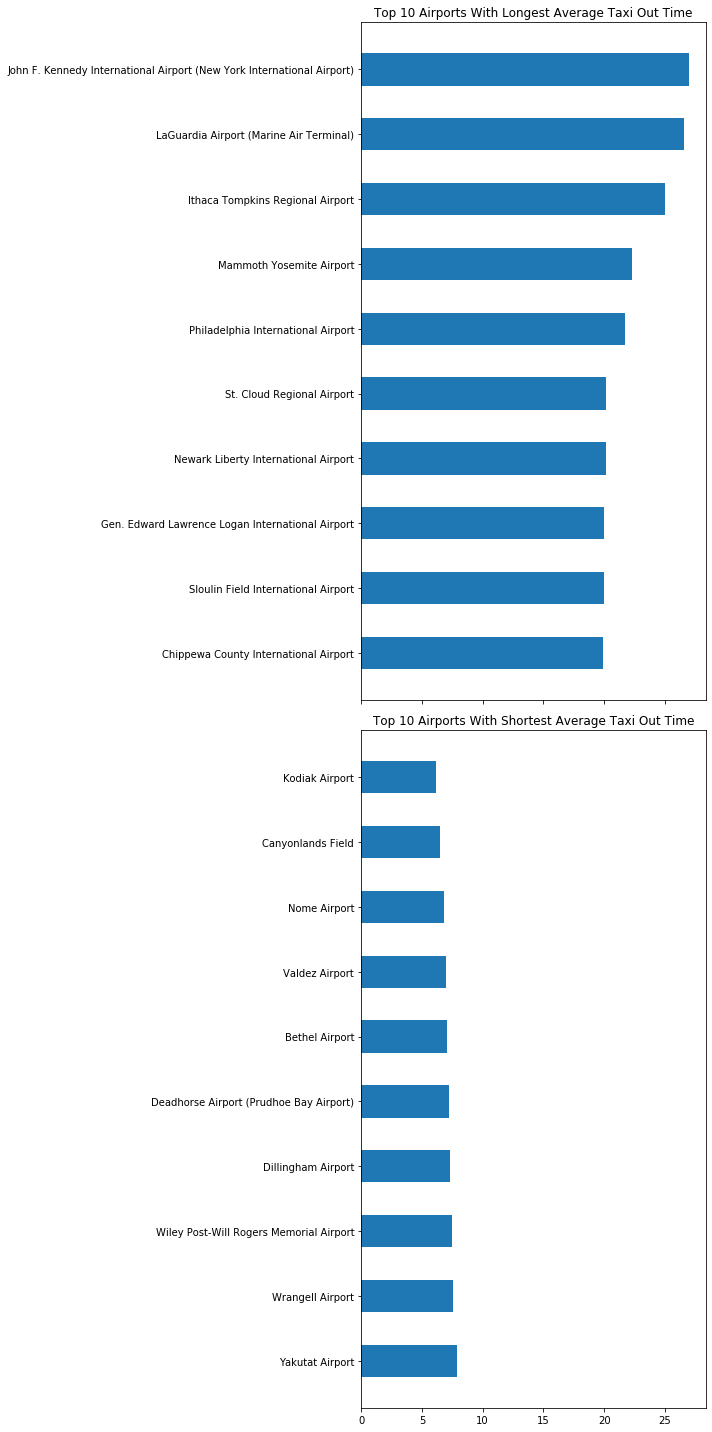

In [46]:
figure, axes = plt.subplots(2,1,figsize=(10,20),sharex=True)
axes[0].bar(x=0, bottom = taxi_out_worst_graph.AIRPORT, height=0.5, 
            width=taxi_out_worst_graph.Average_Taxi_Out, orientation='horizontal')
axes[0].set_title('Top 10 Airports With Longest Average Taxi Out Time')
axes[1].bar(x=0, bottom=taxi_out_best_graph.AIRPORT, height=0.5,
            width=taxi_out_best_graph.Average_Taxi_Out, orientation='horizontal')
axes[1].set_title('Top 10 Airports With Shortest Average Taxi Out Time')
plt.tight_layout()

### Taxi In:

Worst:

In [47]:
taxi_in = flights_1.groupby('DESTINATION_AIRPORT')[['TAXI_IN']].mean().rename(columns = {'TAXI_IN': "Average_Taxi_In"})
taxi_in.reset_index(inplace=True)
taxi_in.sort_values(by='Average_Taxi_In', ascending = False, inplace = True)
taxi_in = pd.merge(taxi_in, airports, left_on = 'DESTINATION_AIRPORT', right_on = 'IATA_CODE', how = 'inner')
taxi_in = taxi_in[['AIRPORT', 'Average_Taxi_In', 'CITY', 'STATE','COUNTRY']].sort_values(by='Average_Taxi_In', ascending = False)
taxi_in_worst_graph = taxi_in.head(10).sort_values(by='Average_Taxi_In', ascending = True)
taxi_in.head()

,AIRPORT,Average_Taxi_In,CITY,STATE,COUNTRY
0,Chicago O'Hare International Airport,13.217535,Chicago,IL,USA
1,Los Angeles International Airport,11.707844,Los Angeles,CA,USA
2,Dallas/Fort Worth International Airport,11.572490,Dallas-Fort Worth,TX,USA
3,Newark Liberty International Airport,9.724922,Newark,NJ,USA
4,Charlotte Douglas International Airport,9.620866,Charlotte,NC,USA


Best:

In [48]:
taxi_in_best_graph = taxi_in.tail(10)
taxi_in.sort_values(by='Average_Taxi_In').head()

,AIRPORT,Average_Taxi_In,CITY,STATE,COUNTRY
321,Valdez Airport,2.485714,Vernal,UT,USA
320,Canyonlands Field,2.657143,Moab,UT,USA
319,Coastal Carolina Regional Airport (Craven Coun...,2.685185,New Bern,NC,USA
318,Toledo Express Airport,2.698925,Toledo,OH,USA
317,San Angelo Regional Airport (Mathis Field),2.952830,San Angelo,TX,USA


### Visualization:

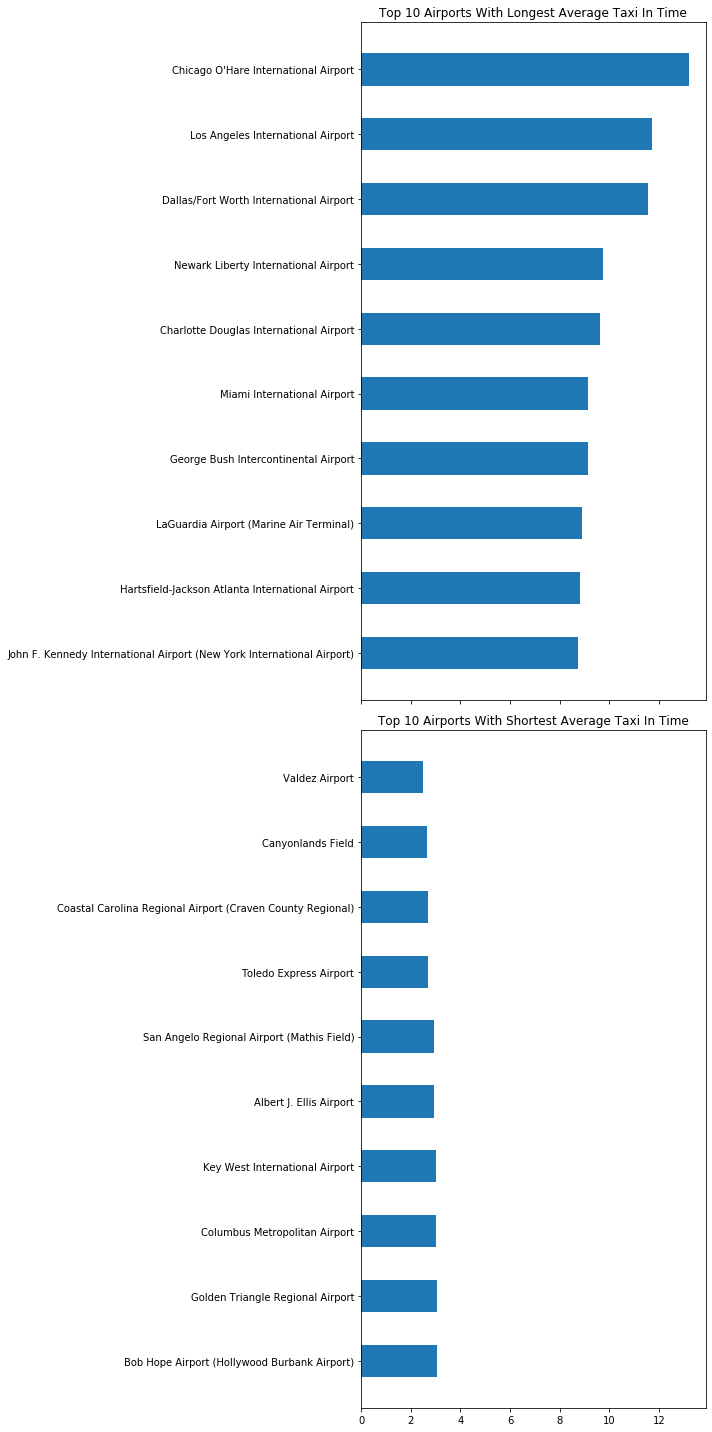

In [49]:
figure, axes = plt.subplots(2,1,figsize=(10,20),sharex=True)
axes[0].bar(x=0, bottom = taxi_in_worst_graph.AIRPORT, height=0.5, 
            width=taxi_in_worst_graph.Average_Taxi_In, orientation='horizontal')
axes[0].set_title('Top 10 Airports With Longest Average Taxi In Time')
axes[1].bar(x=0, bottom=taxi_in_best_graph.AIRPORT, height=0.5,
            width=taxi_in_best_graph.Average_Taxi_In, orientation='horizontal')
axes[1].set_title('Top 10 Airports With Shortest Average Taxi In Time')
plt.tight_layout()